### Creating spark session and loading dataset

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Final_Project") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [2]:
credit = spark.read.load("data/ccdefault.csv",format="csv", sep=",", inferSchema="true", header="true")

### Data exploration

#### Let's look at the schema of the data, see the total number of instances, look at the top 5 rows of the dataset and finaly see the summary of the whole dataset.

In [3]:
credit.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- LIMIT_BAL: integer (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- EDUCATION: integer (nullable = true)
 |-- MARRIAGE: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PAY_0: integer (nullable = true)
 |-- PAY_2: integer (nullable = true)
 |-- PAY_3: integer (nullable = true)
 |-- PAY_4: integer (nullable = true)
 |-- PAY_5: integer (nullable = true)
 |-- PAY_6: integer (nullable = true)
 |-- BILL_AMT1: integer (nullable = true)
 |-- BILL_AMT2: integer (nullable = true)
 |-- BILL_AMT3: integer (nullable = true)
 |-- BILL_AMT4: integer (nullable = true)
 |-- BILL_AMT5: integer (nullable = true)
 |-- BILL_AMT6: integer (nullable = true)
 |-- PAY_AMT1: integer (nullable = true)
 |-- PAY_AMT2: integer (nullable = true)
 |-- PAY_AMT3: integer (nullable = true)
 |-- PAY_AMT4: integer (nullable = true)
 |-- PAY_AMT5: integer (nullable = true)
 |-- PAY_AMT6: integer (nullable = true)
 |-- DEFAULT: integer (nullable = tru

In [4]:
credit.count()

30000

The dataset has a total of 30,000 instances/entries

In [5]:
credit.take(5)

[Row(ID=1, LIMIT_BAL=20000, SEX=2, EDUCATION=2, MARRIAGE=1, AGE=24, PAY_0=2, PAY_2=2, PAY_3=-1, PAY_4=-1, PAY_5=-2, PAY_6=-2, BILL_AMT1=3913, BILL_AMT2=3102, BILL_AMT3=689, BILL_AMT4=0, BILL_AMT5=0, BILL_AMT6=0, PAY_AMT1=0, PAY_AMT2=689, PAY_AMT3=0, PAY_AMT4=0, PAY_AMT5=0, PAY_AMT6=0, DEFAULT=1),
 Row(ID=2, LIMIT_BAL=120000, SEX=2, EDUCATION=2, MARRIAGE=2, AGE=26, PAY_0=-1, PAY_2=2, PAY_3=0, PAY_4=0, PAY_5=0, PAY_6=2, BILL_AMT1=2682, BILL_AMT2=1725, BILL_AMT3=2682, BILL_AMT4=3272, BILL_AMT5=3455, BILL_AMT6=3261, PAY_AMT1=0, PAY_AMT2=1000, PAY_AMT3=1000, PAY_AMT4=1000, PAY_AMT5=0, PAY_AMT6=2000, DEFAULT=1),
 Row(ID=3, LIMIT_BAL=90000, SEX=2, EDUCATION=2, MARRIAGE=2, AGE=34, PAY_0=0, PAY_2=0, PAY_3=0, PAY_4=0, PAY_5=0, PAY_6=0, BILL_AMT1=29239, BILL_AMT2=14027, BILL_AMT3=13559, BILL_AMT4=14331, BILL_AMT5=14948, BILL_AMT6=15549, PAY_AMT1=1518, PAY_AMT2=1500, PAY_AMT3=1000, PAY_AMT4=1000, PAY_AMT5=1000, PAY_AMT6=5000, DEFAULT=0),
 Row(ID=4, LIMIT_BAL=50000, SEX=2, EDUCATION=2, MARRIAGE=1, 

Since it is quite difficult to interpret let's convert it to a pandas dataframe and look at the top 5 rows.

In [6]:
credit.toPandas().head(n=5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
credit.describe()

DataFrame[summary: string, ID: string, LIMIT_BAL: string, SEX: string, EDUCATION: string, MARRIAGE: string, AGE: string, PAY_0: string, PAY_2: string, PAY_3: string, PAY_4: string, PAY_5: string, PAY_6: string, BILL_AMT1: string, BILL_AMT2: string, BILL_AMT3: string, BILL_AMT4: string, BILL_AMT5: string, BILL_AMT6: string, PAY_AMT1: string, PAY_AMT2: string, PAY_AMT3: string, PAY_AMT4: string, PAY_AMT5: string, PAY_AMT6: string, DEFAULT: string]

In [8]:
credit.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
ID,30000,15000.5,8660.398374208891,1,30000
LIMIT_BAL,30000,167484.32266666667,129747.66156720246,10000,1000000
SEX,30000,1.6037333333333332,0.4891291960902602,1,2
EDUCATION,30000,1.8531333333333333,0.7903486597207269,0,6
MARRIAGE,30000,1.5518666666666667,0.5219696006132467,0,3
AGE,30000,35.4855,9.217904068090155,21,79
PAY_0,30000,-0.0167,1.1238015279973335,-2,8
PAY_2,30000,-0.13376666666666667,1.1971859730345495,-2,8
PAY_3,30000,-0.1662,1.1968675684465686,-2,8


###### From the summary and looking manually into the dataset I have infered three points:

1. It can be observed that marriage has a lable '0' but in the description of data it is given marriage has values 1,2 and 3.

2. Education column has 0, 5 and 6 as lables which are not specified in the decription of data.

3. We can see that all the columns have -2 as minimum. But in the description of data it given that -1 indicates pay duly. There is no information regarding -2.

We can deal with these during data cleaning

### Let's see how different variables are distributed and how there are related to one another.

1. Check number of classes in the target variable is balanced of imbalenced.

In [9]:
credit.groupBy('DEFAULT').count().show()

+-------+-----+
|DEFAULT|count|
+-------+-----+
|      1| 6636|
|      0|23364|
+-------+-----+



Visualize it for better interpretation:

30000


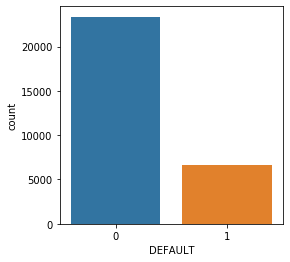

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
credit_pd = credit.toPandas()
print(len(credit_pd))
plt.figure(figsize=(4,4))
sns.countplot(x='DEFAULT', data=credit_pd, order=credit_pd['DEFAULT'].value_counts().index)

2. Let's check how target variable (DEFAULT) is related other technicaly categorical variables (SEX, EDUCATION and MARRIAGE)

In [11]:
credit.select("SEX", "Default").groupBy("Default", 'SEX').count().show()

+-------+---+-----+
|Default|SEX|count|
+-------+---+-----+
|      1|  2| 3763|
|      1|  1| 2873|
|      0|  1| 9015|
|      0|  2|14349|
+-------+---+-----+



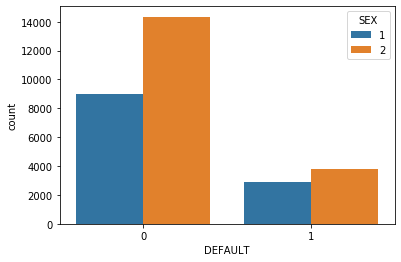

In [12]:
credit_pd = credit.toPandas()
ax = sns.countplot(x="DEFAULT",hue="SEX", data=credit_pd)
plt.show()

In [14]:
credit.select("Marriage", "Default").groupBy("Default", 'Marriage').count().show()

+-------+--------+-----+
|Default|Marriage|count|
+-------+--------+-----+
|      1|       0|    5|
|      1|       2| 3341|
|      1|       1| 3206|
|      1|       3|   84|
|      0|       0|   49|
|      0|       1|10453|
|      0|       2|12623|
|      0|       3|  239|
+-------+--------+-----+



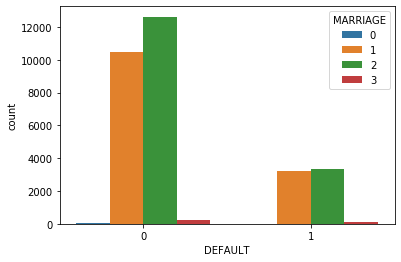

In [15]:
ax = sns.countplot(x="DEFAULT",hue="MARRIAGE", data=credit_pd)
plt.show()

In [16]:
credit.select("Education", "Default").groupBy("Default", 'Education').count().show()

+-------+---------+-----+
|Default|Education|count|
+-------+---------+-----+
|      1|        2| 3330|
|      0|        5|  262|
|      1|        1| 2036|
|      1|        3| 1237|
|      0|        0|   14|
|      1|        4|    7|
|      0|        1| 8549|
|      1|        5|   18|
|      0|        6|   43|
|      0|        2|10700|
|      0|        3| 3680|
|      1|        6|    8|
|      0|        4|  116|
+-------+---------+-----+



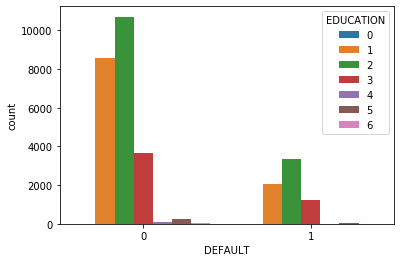

In [17]:
ax = sns.countplot(x="DEFAULT",hue="EDUCATION", data=credit_pd)
plt.show()

3. Let's see the correlations scores btw target variable and categorical variables:

In [18]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=["SEX","DEFAULT"],outputCol="S_D")
credit1 = assembler.transform(credit)
#credit1.select("S_D").show(5)

r1 = Correlation.corr(credit1, "S_D").head()
print("correlation matrix:\n" + str(r1[0]))

correlation matrix:
DenseMatrix([[ 1.        , -0.03996058],
             [-0.03996058,  1.        ]])


In [19]:
assembler = VectorAssembler(inputCols=["EDUCATION","DEFAULT"],outputCol="E_D")
credit2 = assembler.transform(credit)

r2 = Correlation.corr(credit2, "E_D").head()
print("correlation matrix:\n" + str(r2[0]))

correlation matrix:
DenseMatrix([[1.        , 0.02800608],
             [0.02800608, 1.        ]])


In [20]:
assembler = VectorAssembler(inputCols=["MARRIAGE","DEFAULT"],outputCol="M_D")
credit2 = assembler.transform(credit)

r3 = Correlation.corr(credit2, "M_D").head()
print("correlation matrix:\n" + str(r3[0]))

correlation matrix:
DenseMatrix([[ 1.        , -0.02433922],
             [-0.02433922,  1.        ]])


4. I have plotted a heatmap to see the correlation btw all the attibutes/features.

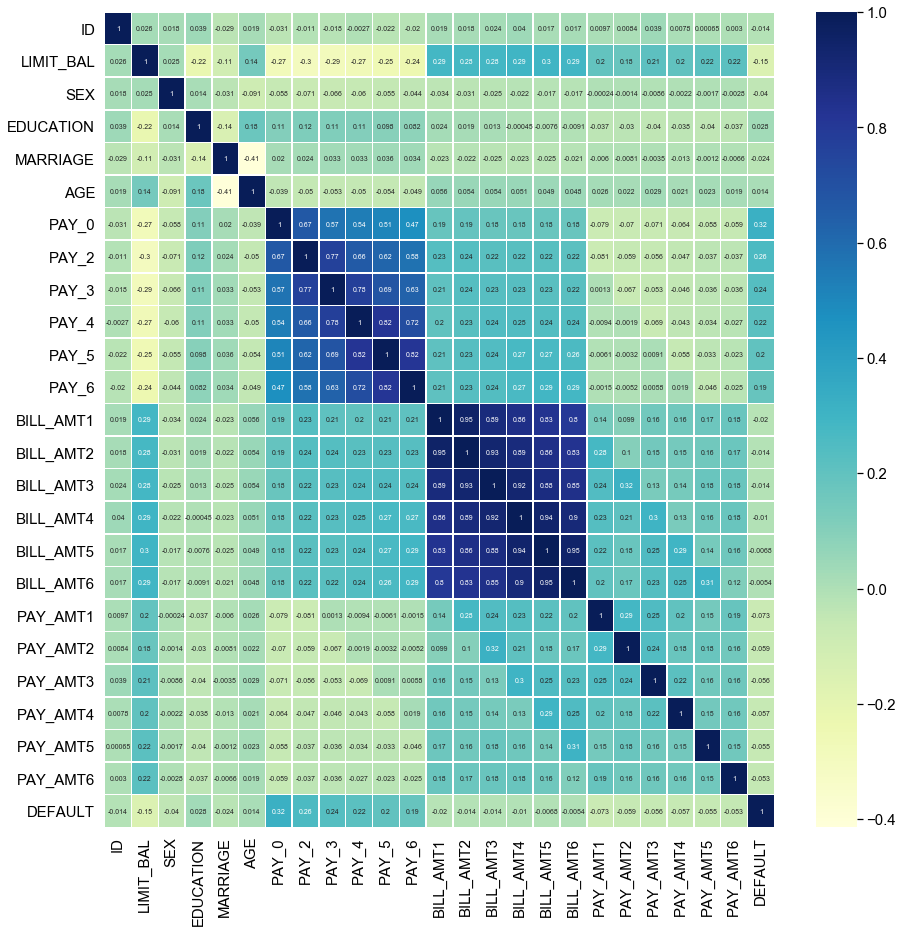

In [21]:
import seaborn as sns; sns.set()
correlation_df = credit.toPandas().corr()

sns.set(rc={"font.style":"normal",
            "axes.titlesize":20,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(15, 15),
            'xtick.labelsize':15,
            'ytick.labelsize':15})
sns.heatmap(correlation_df, annot = True, annot_kws={"size": 7}, cmap="YlGnBu", linewidths=.5)

5. Let's look at the correlation scores btw the target variable and all the other variables.

In [22]:
import six
for i in credit.columns:
    if not( isinstance(credit.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to Default for ", i, credit.stat.corr('DEFAULT',i))

Correlation to Default for  ID -0.013951954838986256
Correlation to Default for  LIMIT_BAL -0.1535198763935072
Correlation to Default for  SEX -0.03996057770544174
Correlation to Default for  EDUCATION 0.02800607765625021
Correlation to Default for  MARRIAGE -0.024339215683404455
Correlation to Default for  AGE 0.013889834301962877
Correlation to Default for  PAY_0 0.32479372847862237
Correlation to Default for  PAY_2 0.26355120167216783
Correlation to Default for  PAY_3 0.2352525137249171
Correlation to Default for  PAY_4 0.2166136368424239
Correlation to Default for  PAY_5 0.2041489138761644
Correlation to Default for  PAY_6 0.18686636165354611
Correlation to Default for  BILL_AMT1 -0.019644197143221576
Correlation to Default for  BILL_AMT2 -0.014193218088215746
Correlation to Default for  BILL_AMT3 -0.014075518043214713
Correlation to Default for  BILL_AMT4 -0.010156495880289678
Correlation to Default for  BILL_AMT5 -0.006760463841014792
Correlation to Default for  BILL_AMT6 -0.0053

## Data cleaning

Let us 1st fix the flaws we noted down earlier in the summary of the data.

1. Assign '0' to other label in marriage column i.e., change all '0' to '3'.
2. Assign '0','5' & '6' to other label in education column i.e., change all '0','5' & '6' to '4'.
3. And I dont want negative values in Pay_x columns so I will change instances with '-2' to 0. Which means duly paid.



In [23]:
from pyspark.sql.functions import *
from pyspark.sql.functions import when, count, col, countDistinct
credit.select(countDistinct('MARRIAGE')).show()

+------------------------+
|count(DISTINCT MARRIAGE)|
+------------------------+
|                       4|
+------------------------+



In [24]:
from pyspark.sql import functions as F
credit_1 = credit.withColumn("MARRIAGE", F.when(F.col("MARRIAGE")==0, 3).otherwise(F.col("MARRIAGE")))
credit_1.select(countDistinct('MARRIAGE')).show()

+------------------------+
|count(DISTINCT MARRIAGE)|
+------------------------+
|                       3|
+------------------------+



In [25]:
credit.select(countDistinct('EDUCATION')).show()

+-------------------------+
|count(DISTINCT EDUCATION)|
+-------------------------+
|                        7|
+-------------------------+



In [26]:
credit_2 = credit_1.withColumn('EDUCATION', F.when(F.col("EDUCATION")==5, 4).otherwise(F.col("EDUCATION"))).withColumn('EDUCATION', F.when(F.col("EDUCATION")==6, 4).otherwise(F.col("EDUCATION"))).withColumn('EDUCATION', F.when(F.col("EDUCATION")==0, 4).otherwise(F.col("EDUCATION")))
credit_2.select(countDistinct('EDUCATION')).show()

+-------------------------+
|count(DISTINCT EDUCATION)|
+-------------------------+
|                        4|
+-------------------------+



In [27]:
credit.select(countDistinct('PAY_0'),countDistinct('PAY_2'),countDistinct('PAY_3'),countDistinct('PAY_4'),countDistinct('PAY_5'),countDistinct('PAY_6')).show()

+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|count(DISTINCT PAY_0)|count(DISTINCT PAY_2)|count(DISTINCT PAY_3)|count(DISTINCT PAY_4)|count(DISTINCT PAY_5)|count(DISTINCT PAY_6)|
+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|                   11|                   11|                   11|                   11|                   10|                   10|
+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+



In [28]:
credit_3 = credit_2.withColumn('PAY_0', F.when((F.col('PAY_0')==-2) | (F.col('PAY_0')==-1), 0).otherwise(F.col('PAY_0'))).withColumn('PAY_2', F.when((F.col('PAY_2')==-2) | (F.col('PAY_2')==-1), 0).otherwise(F.col('PAY_2'))).withColumn('PAY_3', F.when((F.col('PAY_3')==-2) | (F.col('PAY_3')==-1), 0).otherwise(F.col('PAY_3'))).withColumn('PAY_4', F.when((F.col('PAY_4')==-2) | (F.col('PAY_4')==-1), 0).otherwise(F.col('PAY_4'))).withColumn('PAY_5', F.when((F.col('PAY_5')==-2) | (F.col('PAY_5')==-1), 0).otherwise(F.col('PAY_5'))).withColumn('PAY_6', F.when((F.col('PAY_6')==-2) | (F.col('PAY_6')==-1), 0).otherwise(F.col('PAY_6')))
credit_3.select(countDistinct('PAY_0'),countDistinct('PAY_2'),countDistinct('PAY_3'),countDistinct('PAY_4'),countDistinct('PAY_5'),countDistinct('PAY_6')).show()

+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|count(DISTINCT PAY_0)|count(DISTINCT PAY_2)|count(DISTINCT PAY_3)|count(DISTINCT PAY_4)|count(DISTINCT PAY_5)|count(DISTINCT PAY_6)|
+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|                    9|                    9|                    9|                    9|                    8|                    8|
+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+



###### Check if there are any missing values in the dataset.

In [31]:
credit_3.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in credit.columns]).toPandas()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We don't have any missing values in the data set so we can move forward.

### Feature scaling

In [32]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

assembler = VectorAssembler(inputCols=['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4',
'PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT1',
'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'], outputCol="features")

featuredcredit = assembler.transform(credit_3)

scaler = StandardScaler(withMean=True, withStd=True, inputCol="features", outputCol="scaledFeatures")

# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(featuredcredit)

# Normalize each feature to have unit standard deviation.
scaledcredit = scalerModel.transform(featuredcredit)
scaledcredit.select(["features", "scaledFeatures"]).show(5)

+--------------------+--------------------+
|            features|      scaledFeatures|
+--------------------+--------------------+
|(25,[0,1,2,3,4,5,...|[-1.7319642067123...|
|[2.0,120000.0,2.0...|[-1.7318487385830...|
|[3.0,90000.0,2.0,...|[-1.7317332704536...|
|[4.0,50000.0,2.0,...|[-1.7316178023242...|
|[5.0,50000.0,1.0,...|[-1.7315023341948...|
+--------------------+--------------------+
only showing top 5 rows



In [33]:
scaledcredit.show(5)

+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+--------------------+--------------------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|DEFAULT|            features|      scaledFeatures|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+--------------------+--------------------+
|  1|    20000|  2|        2|       1| 24|    2|    2|    0|    0|    0|    0|     3913|     3102|      689|        0|        0|        0|       0|     689|       0|       0|       0|       0|      1|(25,[0,1,2,3,4,5,...|[-1.7319642067123...|
|  2|   120000|  2|        2

Creating final data set for training the model.

In [34]:
renamedcredit = scaledcredit.withColumnRenamed("DEFAULT", "label")
Final_DS = renamedcredit.withColumn('features', renamedcredit.scaledFeatures).select("features","label")
Final_DS.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[-1.7319642067123...|    1|
|[-1.7318487385830...|    1|
|[-1.7317332704536...|    0|
|[-1.7316178023242...|    0|
|[-1.7315023341948...|    0|
+--------------------+-----+
only showing top 5 rows



### Model training

Dividing data into train and test sets:

In [35]:
trainSet, testSet = Final_DS.randomSplit([0.8, 0.2], seed=12345)
print("Training Dataset Count: " + str(trainSet.count()))
print("Test Dataset Count: " + str(testSet.count()))

Training Dataset Count: 23861
Test Dataset Count: 6139


### Logistic Regression

In [36]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from time import *
start_time = time()

#Model training
lr = LogisticRegression(featuresCol = 'features',labelCol = 'label', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lrModel = lr.fit(trainSet)
trainingSummary = lrModel.summary
trainaccuracy = trainingSummary.accuracy
#print("Coefficients: %s" % str(lrModel.coefficients))
#print("Intercept: %s" % str(lrModel.intercept))
print("Training accuracy for Logistic Regression: ",trainaccuracy)

end_time = time()
elapsed_time = end_time - start_time
print("Time to train Logistic Regression model: %.3f seconds" % elapsed_time)

Training accuracy for Logistic Regression:  0.7811072461338586
Time to train Logistic Regression model: 6.744 seconds


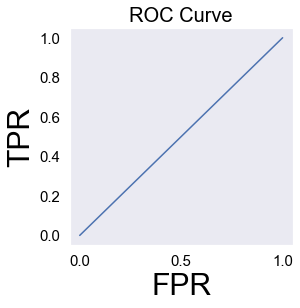

Train areaUnderROC for Logistic Regression: 0.5


In [40]:
#Printing ROC value and ploting ROC curve
train_roc = trainingSummary.roc.toPandas()
plt.figure(figsize=(4,4))
plt.plot(train_roc['FPR'],train_roc['TPR'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()
print("Train areaUnderROC for Logistic Regression: " + str(trainingSummary.areaUnderROC))

In [41]:
start_time = time()

#Prediction
predictions_lr = lrModel.transform(testSet)
predictions_lr.select("features","probability","prediction", "label").show(5)
predictions_lr.groupBy('label','prediction').count().show()

end_time = time()
elapsed_time = end_time - start_time
print("Time for prediction Logistic Regression model: %.3f seconds" % elapsed_time)

+--------------------+--------------------+----------+-----+
|            features|         probability|prediction|label|
+--------------------+--------------------+----------+-----+
|[-1.7315023341948...|[0.78110724613385...|       0.0|    0|
|[-1.7311559298066...|[0.78110724613385...|       0.0|    0|
|[-1.7310404616773...|[0.78110724613385...|       0.0|    0|
|[-1.7302321847716...|[0.78110724613385...|       0.0|    0|
|[-1.7301167166422...|[0.78110724613385...|       0.0|    1|
+--------------------+--------------------+----------+-----+
only showing top 5 rows

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0| 1413|
|    0|       0.0| 4726|
+-----+----------+-----+

Time for prediction Logistic Regression model: 2.792 seconds


In [42]:
#Evaluating Logistic Regression Model.
start_time = time()

lr_evaluator = lrModel.evaluate(testSet)
lr_bc_evaluator = BinaryClassificationEvaluator()
lr_test_roc = lr_bc_evaluator.evaluate(predictions_lr)
print("Test areaUnderROC for Logistic Regression: ",lr_test_roc)


lr_testaccuracy = lr_evaluator.accuracy
print("Test accuracy for Logistic Regression: ",lr_testaccuracy)

end_time = time()
elapsed_time = end_time - start_time
print("Time to evaluate Logistic Regression model: %.3f seconds" % elapsed_time)

Test areaUnderROC for Logistic Regression:  0.5
Test accuracy for Logistic Regression:  0.769832220231308
Time to evaluate Logistic Regression model: 2.747 seconds


### Decision Tree

In [43]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

start_time = time()

#Model training
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(trainSet)

end_time = time()
elapsed_time = end_time - start_time
print("Time to train Decission Tree model: %.3f seconds" % elapsed_time)

Time to train Decission Tree model: 6.026 seconds


In [44]:
start_time = time()

#Prediction
predictions_dt = dtModel.transform(testSet)
predictions_dt.select("features","probability","prediction", "label").show(5)
predictions_dt.groupBy('label','prediction').count().show()

end_time = time()
elapsed_time = end_time - start_time
print("Time for prediction Decission Tree model: %.3f seconds" % elapsed_time)

+--------------------+--------------------+----------+-----+
|            features|         probability|prediction|label|
+--------------------+--------------------+----------+-----+
|[-1.7315023341948...|[0.85783340965755...|       0.0|    0|
|[-1.7311559298066...|[0.85783340965755...|       0.0|    0|
|[-1.7310404616773...|[0.85783340965755...|       0.0|    0|
|[-1.7302321847716...|[0.63099921321793...|       0.0|    0|
|[-1.7301167166422...|[0.85783340965755...|       0.0|    1|
+--------------------+--------------------+----------+-----+
only showing top 5 rows

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0|  873|
|    0|       0.0| 4466|
|    1|       1.0|  540|
|    0|       1.0|  260|
+-----+----------+-----+

Time for prediction Decission Tree model: 2.463 seconds


In [45]:
#Evaluating Decission Tree Model.

start_time = time()

dt_bc_evaluator = BinaryClassificationEvaluator()
dt_test_roc = dt_bc_evaluator.evaluate(predictions_dt, {dt_bc_evaluator.metricName: "areaUnderROC"})
dt_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
dt_testaccuracy = dt_evaluator.evaluate(predictions_dt)
print("Test_roc for Decission Tree:",dt_test_roc)
print("Test accuracy for Decisson Tree: ",dt_testaccuracy )

end_time = time()
elapsed_time = end_time - start_time
print("Time to evaluate Decission Tree model: %.3f seconds" % elapsed_time)

Test_roc for Decission Tree: 0.3141840967091445
Test accuracy for Decisson Tree:  0.8154422544388337
Time to evaluate Decission Tree model: 2.231 seconds


### Random Forest

In [46]:
from pyspark.ml.classification import RandomForestClassifier

start_time = time()

#Training
rf = RandomForestClassifier(labelCol="label", featuresCol="features",numTrees=8)
rfModel = rf.fit(trainSet)

end_time = time()
elapsed_time = end_time - start_time
print("Time to train Random Forest model: %.3f seconds" % elapsed_time)

Time to train Random Forest model: 5.046 seconds


In [47]:
start_time = time()

#prediction
predictions_rf = rfModel.transform(testSet)
predictions_rf.select("features","probability","prediction", "label").show(5)
predictions_rf.groupBy('label','prediction').count().show()

end_time = time()
elapsed_time = end_time - start_time
print("Time for prediction Random Forest model: %.3f seconds" % elapsed_time)

+--------------------+--------------------+----------+-----+
|            features|         probability|prediction|label|
+--------------------+--------------------+----------+-----+
|[-1.7315023341948...|[0.84512756533716...|       0.0|    0|
|[-1.7311559298066...|[0.81484243820512...|       0.0|    0|
|[-1.7310404616773...|[0.77004703033712...|       0.0|    0|
|[-1.7302321847716...|[0.69273486365610...|       0.0|    0|
|[-1.7301167166422...|[0.65209281351802...|       0.0|    1|
+--------------------+--------------------+----------+-----+
only showing top 5 rows

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0| 1031|
|    0|       0.0| 4544|
|    1|       1.0|  382|
|    0|       1.0|  182|
+-----+----------+-----+

Time for prediction Random Forest model: 1.997 seconds


In [48]:
#Evaluating Random Forest model

start_time = time()

rf_bc_evaluator = BinaryClassificationEvaluator()
rf_test_roc = rf_bc_evaluator.evaluate(predictions_rf, {rf_bc_evaluator.metricName: "areaUnderROC"})
rf_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
rf_testaccuracy = rf_evaluator.evaluate(predictions_rf)
print("Test_roc for Random Forest:",rf_test_roc)
print("Test accuracy for Random Forest: ",rf_testaccuracy )

end_time = time()
elapsed_time = end_time - start_time
print("Time to evaluate Random Forest model: %.3f seconds" % elapsed_time)

Test_roc for Random Forest: 0.7747711160408504
Test accuracy for Random Forest:  0.8024108160938264
Time to evaluate Random Forest model: 2.060 seconds


## Model Selection a.k.a. hyperparameter tuning

##### For LR

In [53]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.mllib.evaluation import BinaryClassificationMetrics

start_time = time()

# Creating ParamGrid for Cross Validation
lr_paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.1, 0.01]) \
    .build()

# Creating CrossValidator
lr_crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=lr_paramGrid,
                          evaluator=BinaryClassificationEvaluator(),
                          numFolds=10)

# Run cross validations
lr_cvModel = lr_crossval.fit(trainSet)

end_time = time()
elapsed_time = end_time - start_time
print("Time to train Logistic Regression best model: %.3f seconds" % elapsed_time)

lr_cvModel.bestModel

Time to train Logistic Regression best model: 35.896 seconds


LogisticRegressionModel: uid = LogisticRegression_fd41965320d1, numClasses = 2, numFeatures = 25

In [54]:
start_time = time()

#Performing predictions
predictions_lr = lr_cvModel.transform(testSet)
predictions_lr.select("features","probability", "prediction", "label").show(5)
predictions_lr.groupBy('label','prediction').count().show()

end_time = time()
elapsed_time = end_time - start_time
print("Time for predicting Logistic Regression best model: %.3f seconds" % elapsed_time)

+--------------------+--------------------+----------+-----+
|            features|         probability|prediction|label|
+--------------------+--------------------+----------+-----+
|[-1.7315023341948...|[0.83971676529429...|       0.0|    0|
|[-1.7311559298066...|[0.85090943860679...|       0.0|    0|
|[-1.7310404616773...|[0.81287756661542...|       0.0|    0|
|[-1.7302321847716...|[0.69323792065982...|       0.0|    0|
|[-1.7301167166422...|[0.69426190085287...|       0.0|    1|
+--------------------+--------------------+----------+-----+
only showing top 5 rows

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0|  957|
|    0|       0.0| 4522|
|    1|       1.0|  456|
|    0|       1.0|  204|
+-----+----------+-----+

Time for predicting Logistic Regression best model: 1.534 seconds


In [55]:
start_time = time()

#Evaluating Model
lr_cv_evaluator = BinaryClassificationEvaluator()
lr_test_roc = lr_cv_evaluator.evaluate(predictions_lr, {lr_cv_evaluator.metricName: "areaUnderROC"})
print("Test_roc for Logistic Regression best model:",lr_test_roc)

lr_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
lr_testaccuracy = lr_evaluator.evaluate(predictions_lr)
print("Test accuracy for Logistic Regression best model: ",lr_testaccuracy )

end_time = time()
elapsed_time = end_time - start_time
print("Time for evaluating Logistic Regression best model: %.3f seconds" % elapsed_time)

Test_roc for Logistic Regression best model: 0.761505969446995
Test accuracy for Logistic Regression best model:  0.8108812510180812
Time for evaluating Logistic Regression best model: 1.486 seconds


##### For RF

In [56]:
start_time = time()

# Creating ParamGrid for Cross Validation
rf_paramGrid = ParamGridBuilder()\
   .addGrid(rf.maxDepth, [1, 2, 4, 5])\
   .addGrid(rf.minInstancesPerNode, [1, 2, 4, 5])\
   .build()

rf_cv_evaluator = BinaryClassificationEvaluator()

# Creating CrossValidator
rf_crossval = CrossValidator(estimator = rf,
                          estimatorParamMaps = rf_paramGrid,
                          evaluator = rf_cv_evaluator,
                          numFolds = 10)

# Run cross validations
rf_cvModel = rf_crossval.fit(trainSet)

end_time = time()
elapsed_time = end_time - start_time
print("Time to train Random Forest best model: %.3f seconds" % elapsed_time)

rf_cvModel.bestModel

Time to train Random Forest best model: 239.636 seconds


RandomForestClassificationModel (uid=RandomForestClassifier_88772c47d91f) with 8 trees

In [57]:
start_time = time()

#Performing predictions
predictions_rf = rf_cvModel.transform(testSet)
predictions_rf.select("features", "probability", "prediction","label").show(5)
predictions_rf.groupBy('label','prediction').count().show()

end_time = time()
elapsed_time = end_time - start_time
print("Time for predicting Random Forest best model: %.3f seconds" % elapsed_time)

+--------------------+--------------------+----------+-----+
|            features|         probability|prediction|label|
+--------------------+--------------------+----------+-----+
|[-1.7315023341948...|[0.84881217540817...|       0.0|    0|
|[-1.7311559298066...|[0.84214309941368...|       0.0|    0|
|[-1.7310404616773...|[0.79268043442095...|       0.0|    0|
|[-1.7302321847716...|[0.71635824971153...|       0.0|    0|
|[-1.7301167166422...|[0.68446466013504...|       0.0|    1|
+--------------------+--------------------+----------+-----+
only showing top 5 rows

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0| 1023|
|    0|       0.0| 4557|
|    1|       1.0|  390|
|    0|       1.0|  169|
+-----+----------+-----+

Time for predicting Random Forest best model: 1.331 seconds


In [58]:
start_time = time()

#Evaluating model
rf_test_roc = rf_cv_evaluator.evaluate(predictions_rf, {rf_cv_evaluator.metricName: "areaUnderROC"})
print("Test_roc for Random Forest best model:",rf_test_roc)

rf_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
rf_testaccuracy = rf_evaluator.evaluate(predictions_rf)
print("Test accuracy for Random Forest best model: ",rf_testaccuracy )

end_time = time()
elapsed_time = end_time - start_time
print("Time for evaluating Random Forest best model: %.3f seconds" % elapsed_time)

Test_roc for Random Forest best model: 0.7707972999644496
Test accuracy for Random Forest best model:  0.8058315686593908
Time for evaluating Random Forest best model: 1.123 seconds


### Working with imbalanced target variable
Since the classes in our target variable is imbalanced we need to deal with so that the model is not biased to a single class.
This can be delt by assigning weights to the classes.

In [49]:
from pyspark.sql.functions import when
ratio = 0.85
def assigning_weights(default):
    return when(default == 1, ratio).otherwise(1*(1-ratio))
credit_4 = credit_3.withColumn('weights', assigning_weights(F.col('DEFAULT')))

In [51]:
credit_4.select("weights","DEFAULT").toPandas()

,weights,DEFAULT
0,0.85,1
1,0.85,1
2,0.15,0
3,0.15,0
4,0.15,0
...,...,...
29995,0.15,0
29996,0.15,0
29997,0.85,1
29998,0.85,1


### Scaling features

In [52]:
assembler = VectorAssembler(inputCols=['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4',
'PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT1',
'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','weights'], outputCol="features")

featuredcredit = assembler.transform(credit_4)

scaler = StandardScaler(withMean=True, withStd=True, inputCol="features", outputCol="scaledFeatures")

# Fitting StandardScaler
scalerModel = scaler.fit(featuredcredit)

# Scaling the dataset.
scaledcredit = scalerModel.transform(featuredcredit)
scaledcredit.select(["features", "scaledFeatures"]).show(5)

+--------------------+--------------------+
|            features|      scaledFeatures|
+--------------------+--------------------+
|(26,[0,1,2,3,4,5,...|[-1.7319642067123...|
|[2.0,120000.0,2.0...|[-1.7318487385830...|
|[3.0,90000.0,2.0,...|[-1.7317332704536...|
|[4.0,50000.0,2.0,...|[-1.7316178023242...|
|[5.0,50000.0,1.0,...|[-1.7315023341948...|
+--------------------+--------------------+
only showing top 5 rows



### Creating final dataset

In [53]:
renamedcredit_1 = scaledcredit.withColumnRenamed("DEFAULT", "label")
Final_DS_1 = renamedcredit_1.withColumn('features', renamedcredit_1.scaledFeatures).select("features","label")
Final_DS_1.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[-1.7319642067123...|    1|
|[-1.7318487385830...|    1|
|[-1.7317332704536...|    0|
|[-1.7316178023242...|    0|
|[-1.7315023341948...|    0|
+--------------------+-----+
only showing top 5 rows



### Spliting data for training and testing

In [54]:
trainSet, testSet = Final_DS_1.randomSplit([0.8, 0.2], seed=12345)
print("Training Dataset Count: " + str(trainSet.count()))
print("Test Dataset Count: " + str(testSet.count()))

Training Dataset Count: 23861
Test Dataset Count: 6139


### Logistic Regression on balanced target variable data

Training accuracy for Logistic Regression on weighted target variable:  0.7811072461338586


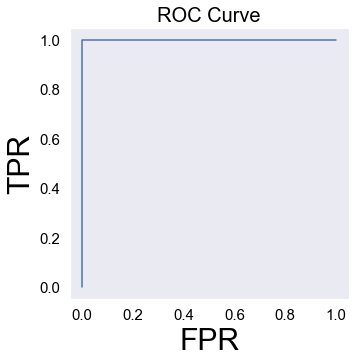

Train areaUnderROC for Logistic Regression on weighted target variable: 1.0
+--------------------+--------------------+----------+-----+
|            features|         probability|prediction|label|
+--------------------+--------------------+----------+-----+
|[-1.7315023341948...|[0.85156346063794...|       0.0|    0|
|[-1.7311559298066...|[0.85156346063794...|       0.0|    0|
|[-1.7310404616773...|[0.85156346063794...|       0.0|    0|
|[-1.7302321847716...|[0.85156346063794...|       0.0|    0|
|[-1.7301167166422...|[0.52969590339367...|       0.0|    1|
+--------------------+--------------------+----------+-----+
only showing top 5 rows

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0| 1413|
|    0|       0.0| 4726|
+-----+----------+-----+

Test areaUnderROC for Logistic Regression on weighted target variable:  1.0
Test accuracy for Logistic Regression on weighted target variable:  0.769832220231308


In [57]:
lr = LogisticRegression(featuresCol = 'features',labelCol = 'label', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lrModel = lr.fit(trainSet)
trainingSummary = lrModel.summary
trainaccuracy = trainingSummary.accuracy
#print("Coefficients: %s" % str(lrModel.coefficients))
#print("Intercept: %s" % str(lrModel.intercept))
print("Training accuracy for Logistic Regression on weighted target variable: ",trainaccuracy)


train_roc = trainingSummary.roc.toPandas()
plt.figure(figsize=(5,5))
plt.plot(train_roc['FPR'],train_roc['TPR'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()
print("Train areaUnderROC for Logistic Regression on weighted target variable: " + str(trainingSummary.areaUnderROC))

predictions = lrModel.transform(testSet)
predictions.select("features","probability","prediction", "label").show(5)
predictions.groupBy('label','prediction').count().show()

evaluator = lrModel.evaluate(testSet)
bc_evaluator = BinaryClassificationEvaluator()
test_roc = bc_evaluator.evaluate(predictions)
print("Test areaUnderROC for Logistic Regression on weighted target variable: ",test_roc)

testaccuracy = evaluator.accuracy
print("Test accuracy for Logistic Regression on weighted target variable: ",testaccuracy)

### Decission tree for balanced target variable data

In [58]:
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(trainSet)


predictions = dtModel.transform(testSet)
predictions.select("features","probability","prediction", "label").show(5)
predictions.groupBy('label','prediction').count().show()

bc_evaluator = BinaryClassificationEvaluator()
test_roc = bc_evaluator.evaluate(predictions, {bc_evaluator.metricName: "areaUnderROC"})
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
testaccuracy = evaluator.evaluate(predictions)
print("Test_roc for Decision tree on weighted target variable:",test_roc)
print("Test accuracy for Decision tree on weighted target variable: ",testaccuracy )

+--------------------+-----------+----------+-----+
|            features|probability|prediction|label|
+--------------------+-----------+----------+-----+
|[-1.7315023341948...|  [1.0,0.0]|       0.0|    0|
|[-1.7311559298066...|  [1.0,0.0]|       0.0|    0|
|[-1.7310404616773...|  [1.0,0.0]|       0.0|    0|
|[-1.7302321847716...|  [1.0,0.0]|       0.0|    0|
|[-1.7301167166422...|  [0.0,1.0]|       1.0|    1|
+--------------------+-----------+----------+-----+
only showing top 5 rows

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    0|       0.0| 4726|
|    1|       1.0| 1413|
+-----+----------+-----+

Test_roc for Decision tree on weighted target variable: 1.0
Test accuracy for Decision tree on weighted target variable:  1.0


### Random forest for balanced target variable data

In [59]:
rf = RandomForestClassifier(labelCol="label", featuresCol="features",numTrees=8)
rfModel = rf.fit(trainSet)

predictions = rfModel.transform(testSet)
predictions.select("features","probability","prediction", "label").show(5)
predictions.groupBy('label','prediction').count().show()

bc_evaluator = BinaryClassificationEvaluator()
test_roc = bc_evaluator.evaluate(predictions, {bc_evaluator.metricName: "areaUnderROC"})
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
testaccuracy = evaluator.evaluate(predictions)
print("Test_roc for Random forest on weighted target variable:",test_roc)
print("Test accuracy for Random forest on weighted target variable: ",testaccuracy )

+--------------------+--------------------+----------+-----+
|            features|         probability|prediction|label|
+--------------------+--------------------+----------+-----+
|[-1.7315023341948...|[0.96270837699876...|       0.0|    0|
|[-1.7311559298066...|[0.97692174515235...|       0.0|    0|
|[-1.7310404616773...|[0.95283742331288...|       0.0|    0|
|[-1.7302321847716...|[0.94577735124760...|       0.0|    0|
|[-1.7301167166422...|[0.35909900622357...|       1.0|    1|
+--------------------+--------------------+----------+-----+
only showing top 5 rows

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    0|       0.0| 4726|
|    1|       1.0| 1413|
+-----+----------+-----+

Test_roc for Random forest on weighted target variable: 1.0
Test accuracy for Random forest on weighted target variable:  1.0
